In [1]:
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms as T
from torchvision import io
import torchutils as tu

from torch.utils.data import DataLoader, random_split

import json
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
torch.cuda.empty_cache()

In [4]:
# model = torchvision.models.googlenet(pretrained=True)
# model.to(device)

In [5]:
from torchvision.models import resnet50, ResNet50_Weights
model1 = resnet50(weights=ResNet50_Weights.DEFAULT)
model1.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [6]:
trnsfrms = T.Compose(
        [
    T.Resize((224, 224)),
    T.ToTensor()
    ]
)

In [7]:
data_dir = '../images/birds'

# Загружаем датасет
full_dataset = datasets.ImageFolder(root=data_dir, transform=trnsfrms)

# Определяем размер тестовой выборки (например, 20%)
#test_size = 0.2
#dataset_size = len(full_dataset)
#test_size = int(test_size * dataset_size)

# Разделяем датасет на обучающую и тестовую выборки
train_dataset, test_dataset = random_split(full_dataset, lengths=(.8, .2))


In [8]:
BATCH_SIZE=128
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=BATCH_SIZE)
valid_loader = DataLoader(test_dataset, shuffle=True, batch_size=BATCH_SIZE)

In [9]:
full_dataset.class_to_idx

{'001.Black_footed_Albatross': 0,
 '002.Laysan_Albatross': 1,
 '003.Sooty_Albatross': 2,
 '004.Groove_billed_Ani': 3,
 '005.Crested_Auklet': 4,
 '006.Least_Auklet': 5,
 '007.Parakeet_Auklet': 6,
 '008.Rhinoceros_Auklet': 7,
 '009.Brewer_Blackbird': 8,
 '010.Red_winged_Blackbird': 9,
 '011.Rusty_Blackbird': 10,
 '012.Yellow_headed_Blackbird': 11,
 '013.Bobolink': 12,
 '014.Indigo_Bunting': 13,
 '015.Lazuli_Bunting': 14,
 '016.Painted_Bunting': 15,
 '017.Cardinal': 16,
 '018.Spotted_Catbird': 17,
 '019.Gray_Catbird': 18,
 '020.Yellow_breasted_Chat': 19,
 '021.Eastern_Towhee': 20,
 '022.Chuck_will_Widow': 21,
 '023.Brandt_Cormorant': 22,
 '024.Red_faced_Cormorant': 23,
 '025.Pelagic_Cormorant': 24,
 '026.Bronzed_Cowbird': 25,
 '027.Shiny_Cowbird': 26,
 '028.Brown_Creeper': 27,
 '029.American_Crow': 28,
 '030.Fish_Crow': 29,
 '031.Black_billed_Cuckoo': 30,
 '032.Mangrove_Cuckoo': 31,
 '033.Yellow_billed_Cuckoo': 32,
 '034.Gray_crowned_Rosy_Finch': 33,
 '035.Purple_Finch': 34,
 '036.Norther

In [10]:
# for param in model.parameters():
#     param.requires_grad = False

# model.fc.weight.requires_grad = True
# model.fc.bias.requires_grad = True


# model.to(device)


# tu.get_model_summary(model, torch.randn(32, 3, 224, 224, device=device))

In [11]:
for param in model1.parameters():
    param.requires_grad = False

In [12]:
model1.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [13]:
model1.fc.weight.requires_grad = True
model1.fc.bias.requires_grad = True

model1.layer4[0].conv1.weight.requires_grad = True
model1.layer4[0].bn1.weight.requires_grad = True
model1.layer4[0].bn1.bias.requires_grad = True
model1.layer4[0].conv2.weight.requires_grad = True
model1.layer4[0].bn2.weight.requires_grad = True
model1.layer4[0].bn2.bias.requires_grad = True
model1.layer4[0].conv3.weight.requires_grad = True
model1.layer4[0].bn3.weight.requires_grad = True
model1.layer4[0].bn3.bias.requires_grad = True
model1.layer4[0].downsample[0].weight.requires_grad = True
model1.layer4[0].downsample[1].weight.requires_grad = True
model1.layer4[0].downsample[1].bias.requires_grad = True

model1.layer4[1].conv1.weight.requires_grad = True
model1.layer4[1].bn1.weight.requires_grad = True
model1.layer4[1].bn1.bias.requires_grad = True
model1.layer4[1].conv2.weight.requires_grad = True
model1.layer4[1].bn2.weight.requires_grad = True
model1.layer4[1].bn2.bias.requires_grad = True
model1.layer4[1].conv3.weight.requires_grad = True
model1.layer4[1].bn3.weight.requires_grad = True
model1.layer4[1].bn3.bias.requires_grad = True

model1.layer4[2].conv1.weight.requires_grad = True
model1.layer4[2].bn1.weight.requires_grad = True
model1.layer4[2].bn1.bias.requires_grad = True
model1.layer4[2].conv2.weight.requires_grad = True
model1.layer4[2].bn2.weight.requires_grad = True
model1.layer4[2].bn2.bias.requires_grad = True
model1.layer4[2].conv3.weight.requires_grad = True
model1.layer4[2].bn3.weight.requires_grad = True
model1.layer4[2].bn3.bias.requires_grad = True

In [14]:
model1.fc = nn.Linear(2048, 200)

In [15]:
test_batch = next(iter(valid_loader))
test_samples, _ = test_batch
# Получим сводную информацию о модели
tu.get_model_summary(model1.to(device), test_samples[1].unsqueeze(0).to(device))

Layer                                         Kernel              Output          Params           FLOPs
0_conv1                                      [3, 64, 7, 7]   [1, 64, 112, 112]       9,408   118,013,952
1_bn1                                                 [64]   [1, 64, 112, 112]         128     3,211,264
2_relu                                                   -   [1, 64, 112, 112]           0             0
3_maxpool                                                -     [1, 64, 56, 56]           0             0
4_layer1.0.Conv2d_conv1                     [64, 64, 1, 1]     [1, 64, 56, 56]       4,096    12,845,056
5_layer1.0.BatchNorm2d_bn1                            [64]     [1, 64, 56, 56]         128       802,816
6_layer1.0.ReLU_relu                                     -     [1, 64, 56, 56]           0             0
7_layer1.0.Conv2d_conv2                     [64, 64, 3, 3]     [1, 64, 56, 56]      36,864   115,605,504
8_layer1.0.BatchNorm2d_bn2                            [

In [16]:
model1.to(device)
for i, params in model1.named_parameters():
    print(f"{i}: {'Тренируемся' if params.requires_grad else 'ЗАНЯТО'}")

conv1.weight: ЗАНЯТО
bn1.weight: ЗАНЯТО
bn1.bias: ЗАНЯТО
layer1.0.conv1.weight: ЗАНЯТО
layer1.0.bn1.weight: ЗАНЯТО
layer1.0.bn1.bias: ЗАНЯТО
layer1.0.conv2.weight: ЗАНЯТО
layer1.0.bn2.weight: ЗАНЯТО
layer1.0.bn2.bias: ЗАНЯТО
layer1.0.conv3.weight: ЗАНЯТО
layer1.0.bn3.weight: ЗАНЯТО
layer1.0.bn3.bias: ЗАНЯТО
layer1.0.downsample.0.weight: ЗАНЯТО
layer1.0.downsample.1.weight: ЗАНЯТО
layer1.0.downsample.1.bias: ЗАНЯТО
layer1.1.conv1.weight: ЗАНЯТО
layer1.1.bn1.weight: ЗАНЯТО
layer1.1.bn1.bias: ЗАНЯТО
layer1.1.conv2.weight: ЗАНЯТО
layer1.1.bn2.weight: ЗАНЯТО
layer1.1.bn2.bias: ЗАНЯТО
layer1.1.conv3.weight: ЗАНЯТО
layer1.1.bn3.weight: ЗАНЯТО
layer1.1.bn3.bias: ЗАНЯТО
layer1.2.conv1.weight: ЗАНЯТО
layer1.2.bn1.weight: ЗАНЯТО
layer1.2.bn1.bias: ЗАНЯТО
layer1.2.conv2.weight: ЗАНЯТО
layer1.2.bn2.weight: ЗАНЯТО
layer1.2.bn2.bias: ЗАНЯТО
layer1.2.conv3.weight: ЗАНЯТО
layer1.2.bn3.weight: ЗАНЯТО
layer1.2.bn3.bias: ЗАНЯТО
layer2.0.conv1.weight: ЗАНЯТО
layer2.0.bn1.weight: ЗАНЯТО
layer2.0.bn1.bias: З

In [17]:
"""layers = list(model1.children())
for param in model1.parameters():
    param.requires_grad = False

model1.to(device)
layers = list(model1.children())

# Определяем, сколько слоев мы хотим разморозить (например, 3)
num_layers_to_unfreeze = 3

# Размораживаем последние слои
for i in range(1, num_layers_to_unfreeze + 1):
    unfreeze_layer = layers[-i]
    for param in unfreeze_layer.parameters():
        param.requires_grad = True
    print(f"Unfrozen layer: {type(unfreeze_layer)}")

model1.to(device)"""

'layers = list(model1.children())\nfor param in model1.parameters():\n    param.requires_grad = False\n\nmodel1.to(device)\nlayers = list(model1.children())\n\n# Определяем, сколько слоев мы хотим разморозить (например, 3)\nnum_layers_to_unfreeze = 3\n\n# Размораживаем последние слои\nfor i in range(1, num_layers_to_unfreeze + 1):\n    unfreeze_layer = layers[-i]\n    for param in unfreeze_layer.parameters():\n        param.requires_grad = True\n    print(f"Unfrozen layer: {type(unfreeze_layer)}")\n\nmodel1.to(device)'

In [18]:
optimizer = torch.optim.Adam(model1.parameters(), lr=0.0001)
criterion = torch.nn.CrossEntropyLoss()

In [19]:
def fit(
        model: torch.nn.Module, 
        n_epochs: int, 
        optimizer: torch.optim.Optimizer,
        train_loader: DataLoader,
        valid_loader: DataLoader,
        history = None,
        criterion=criterion,
        ) -> tuple[list, ...]:

    history = history or {
        'train_accs': [],
        'train_losses': [],
        'valid_accs': [],
        'valid_losses': [],
    }

    start_epoch = len(history['train_accs'])

    for epoch in range(start_epoch+1, start_epoch+n_epochs+1):
        
        print(f'{"-"*11} Epoch {epoch}/{n_epochs} {"-"*11}')

        model.train()
        batch_accs = []
        batch_losses = [] 

        for images, labels in train_loader:
            
            images = images.to(device)
            labels = labels.to(device)

            y_pred = model(images)
            loss = criterion(y_pred, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batch_losses.append(loss.item())
            batch_accs.append((y_pred.argmax(axis=1) == labels).cpu().numpy().mean())

        history['train_losses'].append(np.mean(batch_losses))
        history['train_accs'].append(np.mean(batch_accs))

        model.eval()

        batch_losses = []
        batch_accs = []

        for images, labels in valid_loader:

            images = images.to(device)
            labels = labels.to(device)

            with torch.no_grad():
                y_pred = model(images.to(device))
            
            loss = criterion(y_pred, labels.to(device))
            batch_losses.append(loss.item())
            batch_accs.append((y_pred.argmax(axis=1) == labels).cpu().numpy().mean())

        history['valid_accs'].append(np.mean(batch_accs))
        history['valid_losses'].append(np.mean(batch_losses))

        print(
            f'train: accuracy {history["train_accs"][-1]:.4f}, loss {history["train_losses"][-1]:.4f}\n'
            f'valid: accuracy {history["valid_accs"][-1]:.4f}, loss {history["valid_losses"][-1]:.4f}'
        )
        print(f'{"-"*35}')
        print()

    return history

In [20]:
torch.cuda.empty_cache()

In [21]:
#hist1 = fit(model=model1, n_epochs=5, optimizer=optimizer, train_loader=train_loader, valid_loader=valid_loader, criterion=criterion)

In [22]:
%%time

#hist1 = fit(model=model1, n_epochs=5, optimizer=optimizer, train_loader=train_loader, valid_loader=valid_loader, criterion=criterion, history=hist1)

CPU times: user 3 μs, sys: 0 ns, total: 3 μs
Wall time: 7.63 μs


In [23]:
%%time

##hist2 = fit(model=model1, n_epochs=10, optimizer=optimizer, train_loader=train_loader, valid_loader=valid_loader, criterion=criterion, history=hist1)

CPU times: user 3 μs, sys: 1e+03 ns, total: 4 μs
Wall time: 8.34 μs


In [24]:
%%time

best_score_epoch = fit(model=model1, n_epochs=8, optimizer=optimizer, train_loader=train_loader, valid_loader=valid_loader, criterion=criterion)

----------- Epoch 1/8 -----------


train: accuracy 0.1153, loss 4.8048
valid: accuracy 0.2913, loss 3.4541
-----------------------------------

----------- Epoch 2/8 -----------
train: accuracy 0.5414, loss 2.6160
valid: accuracy 0.5848, loss 1.9392
-----------------------------------

----------- Epoch 3/8 -----------
train: accuracy 0.7677, loss 1.2985
valid: accuracy 0.6909, loss 1.3642
-----------------------------------

----------- Epoch 4/8 -----------
train: accuracy 0.8823, loss 0.6894
valid: accuracy 0.7257, loss 1.0863
-----------------------------------

----------- Epoch 5/8 -----------
train: accuracy 0.9462, loss 0.3706
valid: accuracy 0.7491, loss 1.0006
-----------------------------------

----------- Epoch 6/8 -----------
train: accuracy 0.9814, loss 0.1900
valid: accuracy 0.7504, loss 0.9595
-----------------------------------

----------- Epoch 7/8 -----------
train: accuracy 0.9947, loss 0.0995
valid: accuracy 0.7557, loss 0.9247
-----------------------------------

----------- Epoch 8/8 -----------

In [32]:
import mplcyberpunk
plt.style.use("cyberpunk")

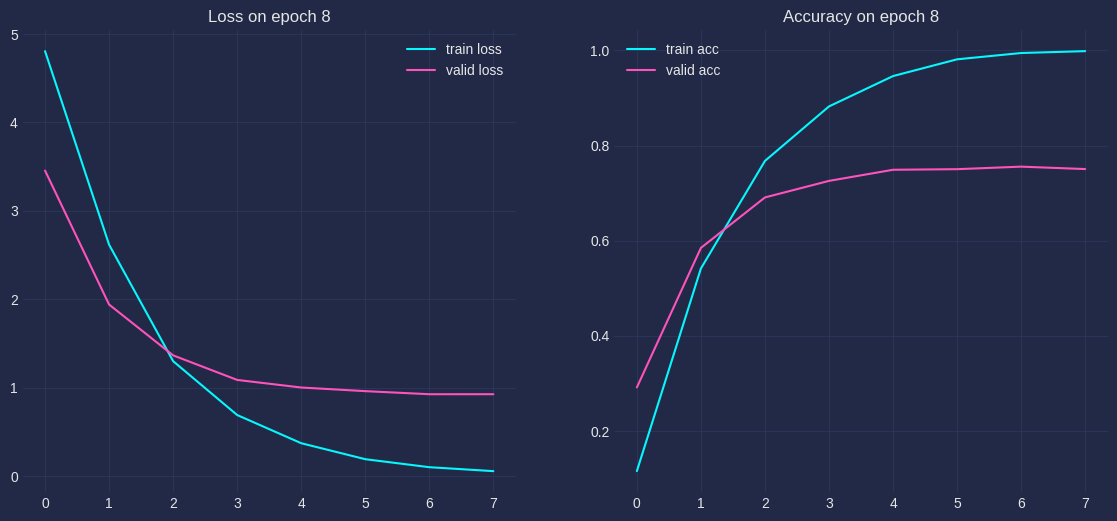

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6)) # type:ignore 

ax[0].plot(best_score_epoch['train_losses'], label='train loss')
ax[0].plot(best_score_epoch['valid_losses'], label='valid loss')
ax[0].set_title(f'Loss on epoch {len(best_score_epoch["train_losses"])}')
#ax[0].set_ylim((0.35, 0.55))
ax[0].legend()

ax[1].plot(best_score_epoch['train_accs'], label='train acc')
ax[1].plot(best_score_epoch['valid_accs'], label='valid acc')
ax[1].set_title(f'Accuracy on epoch {len(best_score_epoch["train_losses"])}')
#ax[1].set_ylim((0.75, 0.9))
ax[1].legend()

plt.show()

In [25]:
#best_score_epoch = fit(model=model1, n_epochs=1, optimizer=optimizer, train_loader=train_loader, valid_loader=valid_loader, criterion=criterion, history=best_score_epoch)

In [26]:
#best_score_epoch = fit(model=model1, n_epochs=1, optimizer=optimizer, train_loader=train_loader, valid_loader=valid_loader, criterion=criterion, history=best_score_epoch)

In [27]:
#%%time

#hist1 = fit(model=model1, n_epochs=1, optimizer=optimizer, train_loader=train_loader, valid_loader=valid_loader, criterion=criterion, history=hist1)

In [28]:
model_weights = '../models/resnet50_birds_5min_before.pt'

torch.save(model1.state_dict(), model_weights)

In [29]:
model2 = resnet50(weights=ResNet50_Weights.DEFAULT)
model2.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [30]:
model2.load_state_dict(torch.load("../models/resnet50_birds.pt", map_location=device))
model2.to(device)

RuntimeError: Error(s) in loading state_dict for ResNet:
	size mismatch for fc.weight: copying a param with shape torch.Size([200, 2048]) from checkpoint, the shape in current model is torch.Size([1000, 2048]).
	size mismatch for fc.bias: copying a param with shape torch.Size([200]) from checkpoint, the shape in current model is torch.Size([1000]).

In [30]:
def get_batch_from_loader(loader):
    batch, labels = next(iter(loader))
    return batch, labels

def plot_predictions(model, loader, device, num_images=32):
    # Получаем батч данных и метки
    batch, labels = get_batch_from_loader(loader)
    batch = batch.to(device)

    # Получаем предсказания модели
    with torch.no_grad():
        outputs = model(batch)
        _, predicted = torch.max(outputs, 1)

    class_names = full_dataset.classes
    # Создаем фигуру и оси
    fig, ax = plt.subplots(4, 8, figsize=(20, 12))
    ax = ax.flatten()

    for i in range(min(num_images, len(batch))):
        # Отображаем изображение
        img = batch[i].cpu().permute(1, 2, 0).squeeze()
        if img.shape[-1] == 1:
            # Если изображение в оттенках серого, отображаем его как есть
            ax[i].matshow(img.squeeze(), cmap='gray')
        else:
            # Если изображение цветное, отображаем его с использованием RGB
            ax[i].imshow(img)
        ax[i].axis('off')

        # Определяем цвет текста
        true_label = labels[i].item()
        pred_label = predicted[i].item()
        if true_label == pred_label:
            color = 'black'
        else:
            color = 'red'

        # Добавляем заголовок с предсказанием и истинной меткой
        title = f'Pred: {class_names[pred_label]} - {pred_label}\nTrue: {class_names[true_label]} - {true_label}'
        ax[i].set_title(title, fontsize=10, color=color)

    plt.tight_layout()
    plt.show()

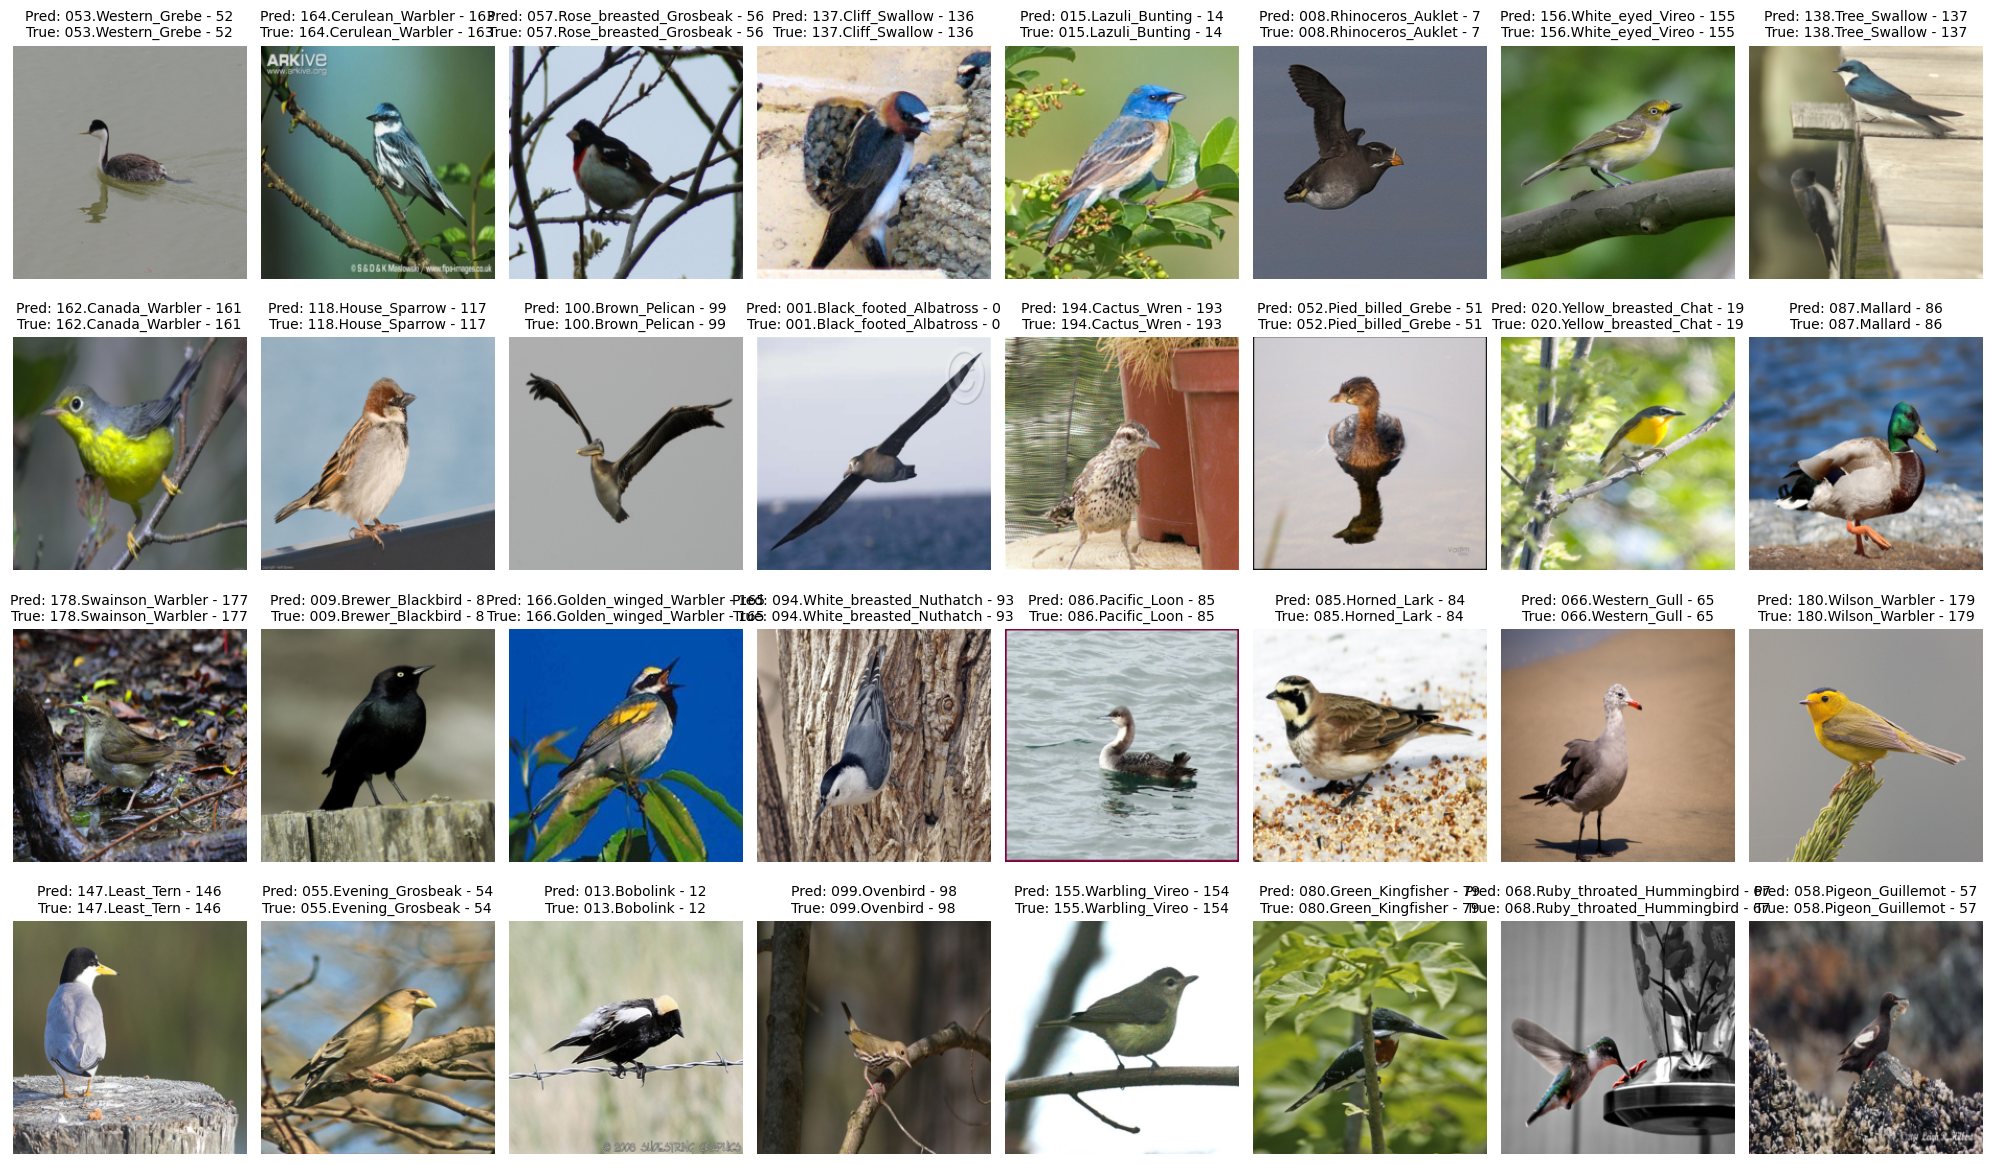

In [ ]:
plot_predictions(model1, valid_loader,device=device, num_images=32)

#### ГРАФИКИ-ЖЕРАФИКИ

In [32]:
time_seg = [
    (5, 12*60 + 9),     # Первые 5 эпох, прогнанные через модель за время, которое указано выше
    (5, 2 * 60 + 20),     # + 1 эпоха
    (5, 2 * 60 + 23)     # + 1 эпоха
]

num_epochs = []
cumulative_time = 0
times = []

for epochs, time in time_seg:
    for _ in range(epochs):
        cumulative_time += time / epochs
        times.append(cumulative_time)
        num_epochs.append(len(num_epochs) + 1)

In [33]:
import mplcyberpunk
plt.style.use("cyberpunk")

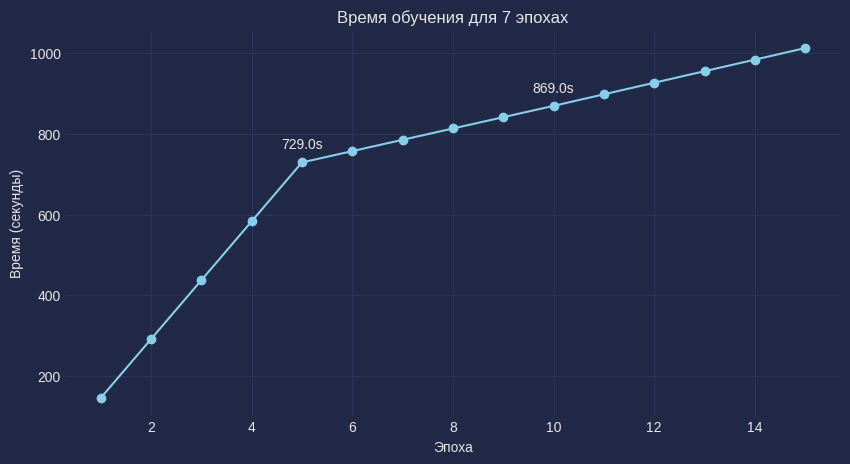

In [ ]:
# Строим график времени

plt.figure(figsize=(10, 5))
plt.plot(num_epochs, times, marker='o', color='skyblue')
plt.title(f'Время обучения для 7 эпохах')
plt.xlabel('Эпоха')
plt.ylabel("Время (секунды)")
plt.grid(True)

for i, txt in enumerate(times):
    if i in [4, 9, 19, 29]:  # Ключевые точки, 5, 10, 20 и 30 эпохи соответственно
        plt.annotate(f'{txt:.1f}s', (num_epochs[i], times[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()

In [35]:
def get_metrics(model, valid_dataloader, device):
    model.eval()
    model.to(device)

    # Метрики по батчам
    accuracy_batch = []
    precision_batch = []
    recall_batch = []
    f1_batch = []
    conf_matrix = torch.zeros((200, 200), dtype=torch.int64)  # Assumes 11 classes

    with torch.no_grad():
        for img, label in valid_dataloader:
            img, label = img.to(device), label.to(device)

            # Получаем выходы модели
            output = model(img)
            
            # Предсказания
            preds = torch.argmax(output, dim=1)
            
            # Проверка на соответствие размеров
            assert preds.shape[0] == label.shape[0], f"Size mismatch: preds {preds.shape}, label {label.shape}"
            
            # Accuracy
            accuracy = (preds == label).float().mean().item()
            accuracy_batch.append(accuracy)

            # Confusion Matrix
            for true, pred in zip(label.cpu(), preds.cpu()):
                conf_matrix[true, pred] += 1

            # Precision, Recall, F1 для текущего батча
            TP = torch.diag(conf_matrix)
            FP = conf_matrix.sum(dim=0) - TP
            FN = conf_matrix.sum(dim=1) - TP

            precision = (TP / (TP + FP + 1e-10)).mean().item()
            recall = (TP / (TP + FN + 1e-10)).mean().item()
            f1 = (2 * precision * recall) / (precision + recall + 1e-10)

            precision_batch.append(precision)
            recall_batch.append(recall)
            f1_batch.append(f1)

            # Очистка памяти
            del img, label, output, preds
            torch.cuda.empty_cache()

    # Усреднение метрик по батчам
    acc = sum(accuracy_batch) / len(accuracy_batch)
    prec = sum(precision_batch) / len(precision_batch)
    rec = sum(recall_batch) / len(recall_batch)
    f1_score = sum(f1_batch) / len(f1_batch)

    # Фиксируем прибыль
    result = {
        'ACCURACY': acc,
        'PRECISION': prec,
        'RECALL': rec,
        'F1': f1_score,
        'CONFUSION MATRIX': conf_matrix
    }

    return result, f1_batch, conf_matrix

In [36]:
out, f1, cfm = get_metrics(model=model1, valid_dataloader=valid_loader, device=device)

In [37]:
out

{'ACCURACY': 0.9508673674181888,
 'PRECISION': 0.9039461487217954,
 'RECALL': 0.9016145185420388,
 'F1': 0.9027773302694877,
 'CONFUSION MATRIX': tensor([[11,  0,  0,  ...,  0,  0,  0],
         [ 0,  7,  1,  ...,  0,  0,  0],
         [ 0,  0,  7,  ...,  0,  0,  0],
         ...,
         [ 0,  0,  0,  ...,  6,  0,  0],
         [ 0,  0,  0,  ...,  0, 15,  0],
         [ 0,  0,  0,  ...,  0,  0, 15]])}

In [38]:
import seaborn as sns

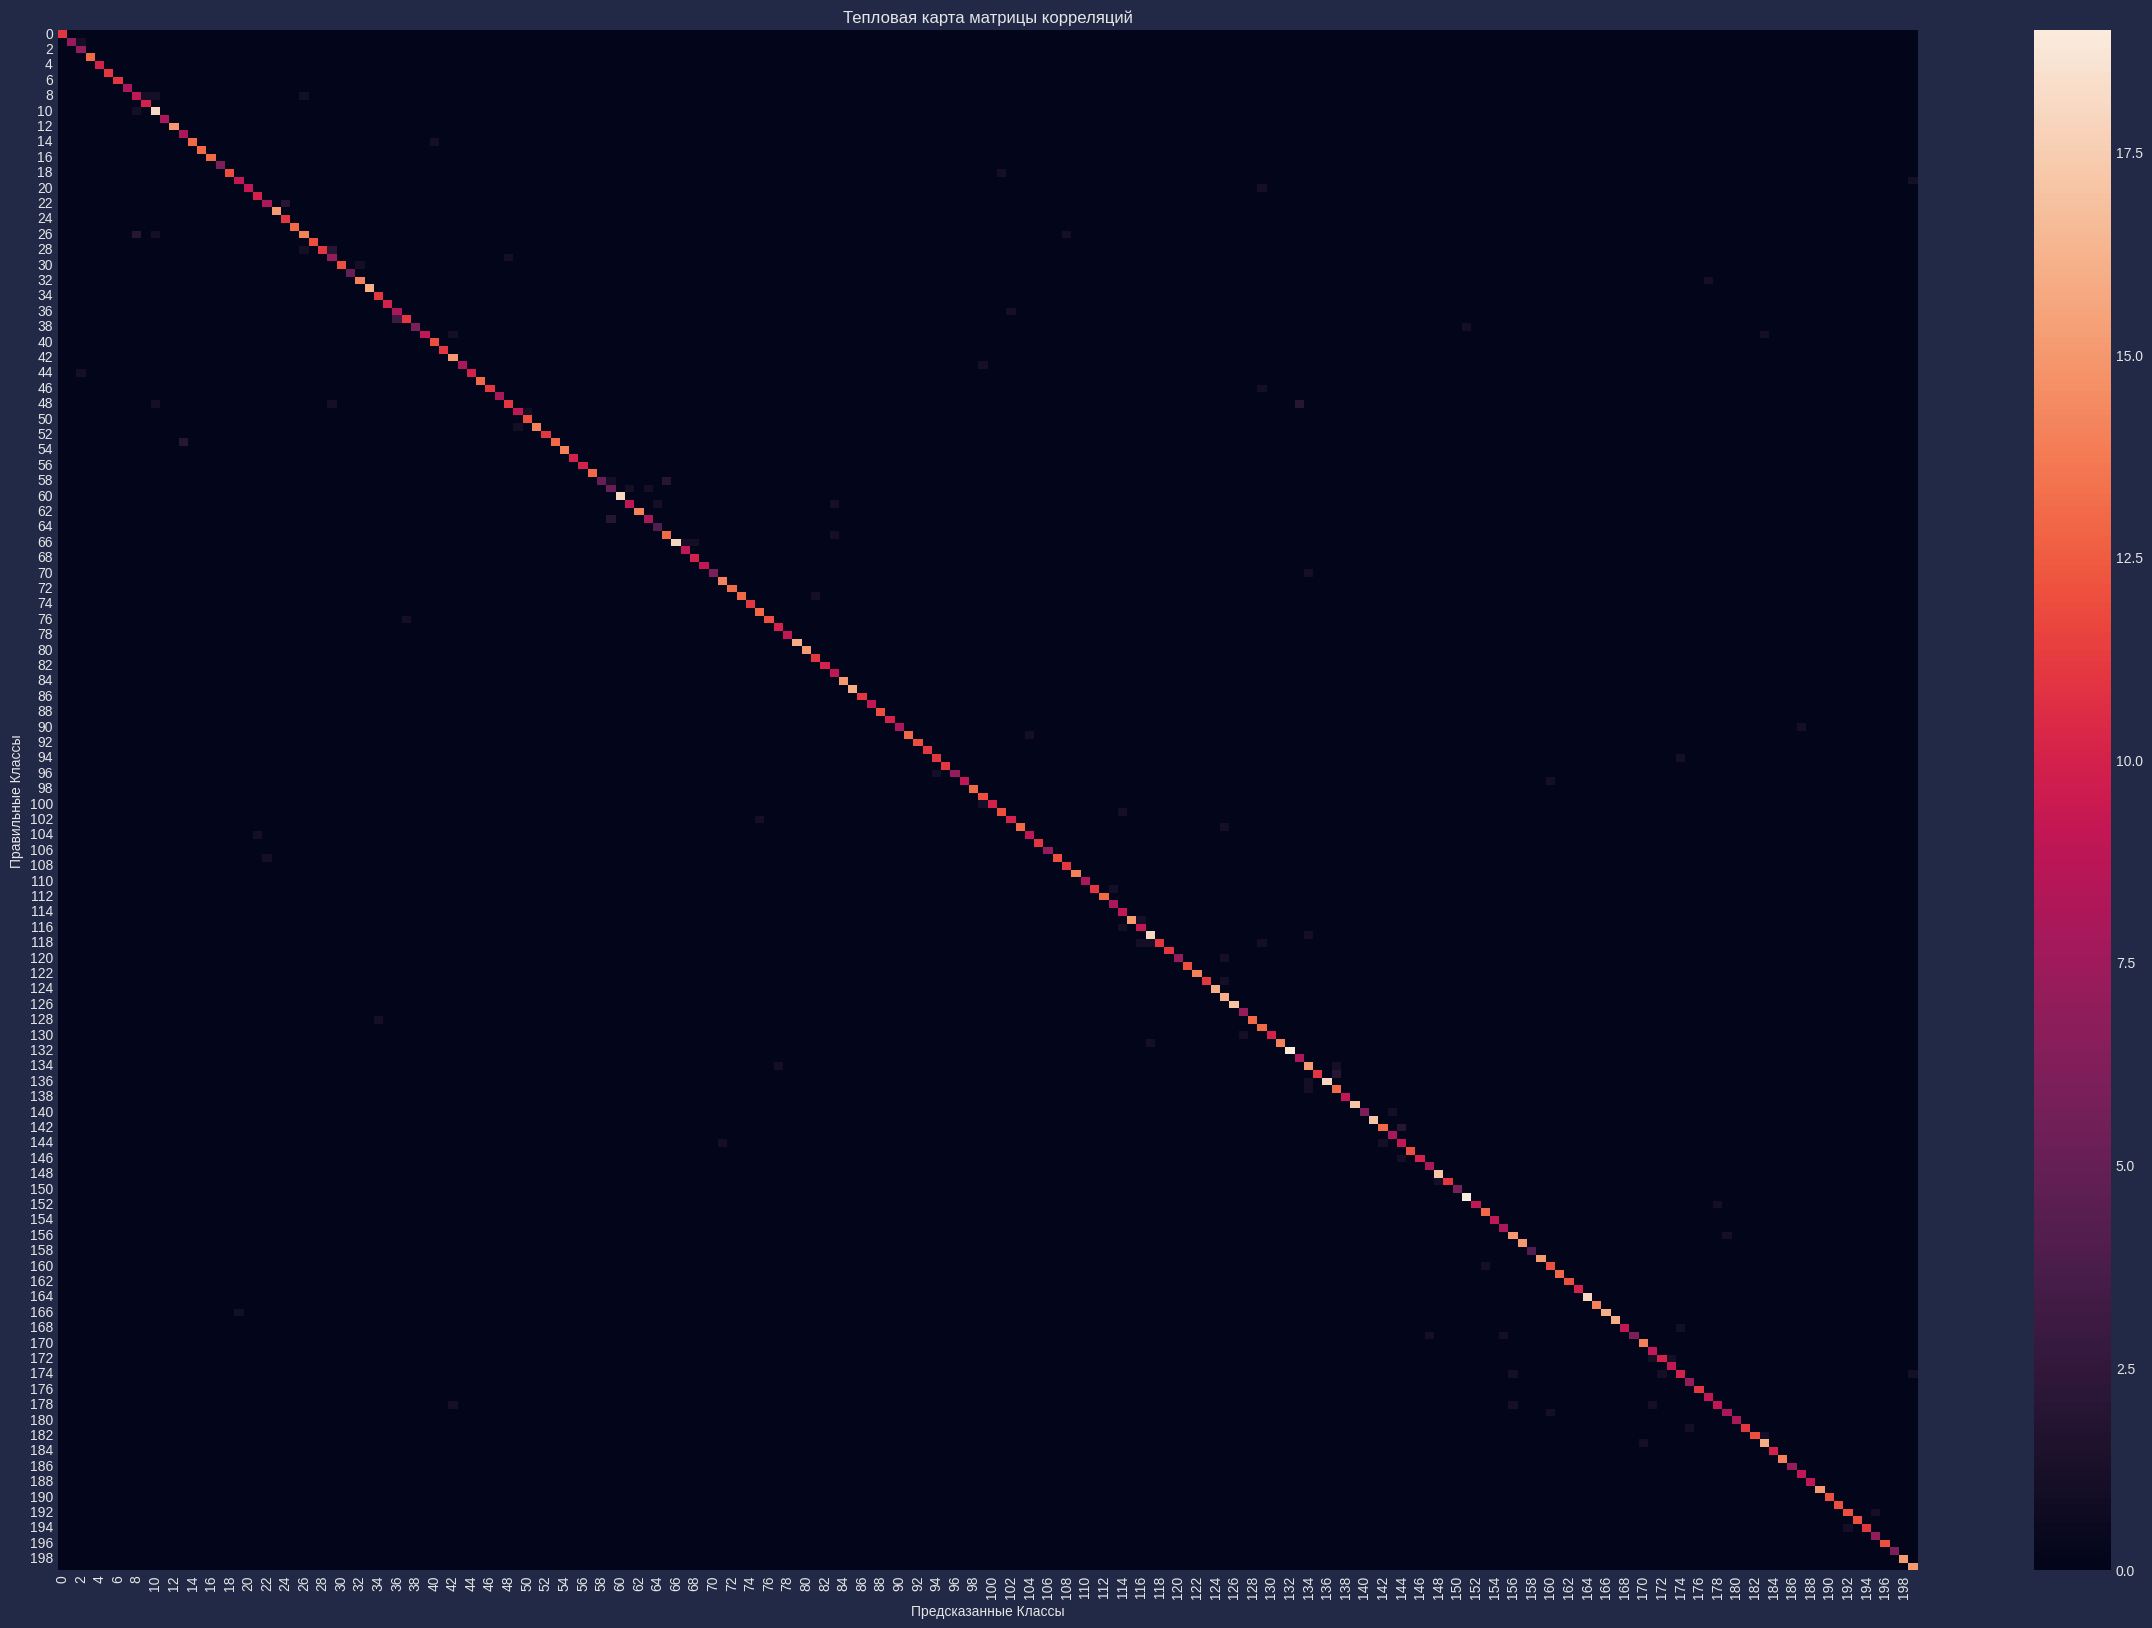

In [40]:
plt.figure(figsize=(30, 20))
sns.heatmap(cfm.cpu().numpy(), annot=False, fmt='d')
plt.title('Тепловая карта матрицы корреляций')
plt.xlabel('Предсказанные Классы')
plt.ylabel('Правильные Классы')
plt.show()